## Media Campaign Cost Prediction

### Define the Problem

Food Mart (CFM) is a chain of convenience stores in the United States. The private company's headquarters are located in Mentor, Ohio, and currently, approximately 325 stores are located in the US. Convenient Food Mart operates on the franchise system.
Food Mart was the nation's third-largest chain of convenience stores as of 1988.
The NASDAQ exchange dropped Convenient Food Mart the same year when the company failed to meet financial reporting requirements.
Carden & Cherry advertised Convenient Food Mart with the Ernest character in the 1980s.

Devise a Machine Learning Model that helps us predict the cost of media campaigns in the food marts on the basis of the features provided.

### Gather the Data

The dataset is given to us via Kaggle
https://www.kaggle.com/datasets/gauravduttakiit/media-campaign-cost-prediction

### Import Libraries

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python

#load packages
import sys #access to system parameters https://docs.python.org/3/library/sys.html
print("Python version: {}". format(sys.version))

import pandas as pd #collection of functions for data processing and analysis modeled after R dataframes with SQL like features
print("pandas version: {}". format(pd.__version__))

import numpy as np #foundational package for scientific computing
print("NumPy version: {}". format(np.__version__))

import scipy as sp #collection of functions for scientific computing and advance mathematics
print("SciPy version: {}". format(sp.__version__)) 

import IPython
from IPython import display #pretty printing of dataframes in Jupyter notebook
print("IPython version: {}". format(IPython.__version__)) 

import sklearn #collection of machine learning algorithms
print("scikit-learn version: {}". format(sklearn.__version__))


import matplotlib #collection of functions for scientific and publication-ready visualization
print("matplotlib version: {}".format(matplotlib.__version__))


#misc libraries
import random
import time


#ignore warnings
import warnings
warnings.filterwarnings('ignore')
print('-'*25)

Python version: 3.8.3 (v3.8.3:6f8c8320e9, May 13 2020, 16:29:34) 
[Clang 6.0 (clang-600.0.57)]
pandas version: 1.5.3
NumPy version: 1.24.2
SciPy version: 1.10.1
IPython version: 8.11.0
scikit-learn version: 1.2.2
matplotlib version: 3.7.1
-------------------------


### Load Data Modelling Libraries

In [7]:
#Common Model Algorithms
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
from xgboost import XGBClassifier

#Common Model Helpers
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics

#Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab

import seaborn as sns
print("seaborn: {}". format(sns.__version__))

from pandas.plotting import scatter_matrix

#Configure Visualization Defaults
#%matplotlib inline = show plots in Jupyter Notebook browser
%matplotlib inline
mpl.style.use('ggplot')
sns.set_style('white')
pylab.rcParams['figure.figsize'] = 12,8

print("Imported")

seaborn: 0.12.2
Imported


### Meet and Greet Data

Get to know your data, 
- What does it look like (datatype and values), 
- What makes it tick (independent/feature variables(s)), 
- What's its goals in life (dependent/target variable(s)).


#### Dataset Description I

- store_sales(in millions) - store_sales(in million dollars)
- unit_sales(in millions) - unit_sales(in millions) in stores Quantity
- Total_children - TOTAL CHILDREN IN HOME
- avg_cars_at home(approx) - avg_cars_at home(approx) 
- Num_children_at_home - num_children_at_home AS PER CUSTOMERS FILLED DETAILS
- Gross_weight - gross_weight OF ITEM
- Recyclable_package - FOOD ITEM IS recyclable_package
- Low_fat - LOW_FAT FOOD ITEM IS LOW FAT
- Units_per_case - UNITS/CASE UNITS AVAILABLE IN EACH STORE SHELVES
- Store_sqft - STORE AREA AVAILABLE IN SQFT
- Coffee_bar - COFFEE BAR available in store
- Video_store - VIDEO STORE/gaming store available
- Salad_bar - SALAD BAR available in store
- Prepared_food - food prepared available in store
- Florist - flower shelves available in store
- Cost - COST ON ACQUIRING A CUSTOMERS in dollars

#### Dataset Description II

To begin this step, we first import our data. Next we use the info() and sample() function, to get a quick overview of variable datatypes (i.e. qualitative vs quantitative)

- The `Cost` variable is our outcome or `Dependent Variable`. The variable "cost" is always rounded to 2 decimal places, and that's why it cannot take all possible values in an interval, so this technically should be discrete. But if you measure it accurately it should be treated as continuous. A continuous random variable can take all values in an interval, while discrete variable can only take countable values.

In [12]:
#import data from file: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html
data_raw = pd.read_csv('/Users/richeyjay/Desktop/MediaCampaignCostPredictionML/env/Code/train_dataset.csv')


#a dataset should be broken into 3 splits: train, test, and (final) validation
#the test file provided is the validation file for competition submission
#we will split the train set into train and test data in future sections
data_val  = pd.read_csv('/Users/richeyjay/Desktop/MediaCampaignCostPredictionML/env/Code/test_dataset.csv')


#to play with our data we'll create a copy
#remember python assignment or equal passes by reference vs values, so we use the copy function: https://stackoverflow.com/questions/46327494/python-pandas-dataframe-copydeep-false-vs-copydeep-true-vs
data1 = data_raw.copy(deep = True)

#however passing by reference is convenient, because we can clean both datasets at once
data_cleaner = [data1, data_val]

#preview data
print (data_raw.info()) #https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.info.html
#data_raw.head() #https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.head.html
#data_raw.tail() #https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.tail.html
data_raw.sample(10) #https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.sample.html

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51363 entries, 0 to 51362
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   store_sales(in millions)    51363 non-null  float64
 1   unit_sales(in millions)     51363 non-null  float64
 2   total_children              51363 non-null  float64
 3   num_children_at_home        51363 non-null  float64
 4   avg_cars_at home(approx).1  51363 non-null  float64
 5   gross_weight                51363 non-null  float64
 6   recyclable_package          51363 non-null  float64
 7   low_fat                     51363 non-null  float64
 8   units_per_case              51363 non-null  float64
 9   store_sqft                  51363 non-null  float64
 10  coffee_bar                  51363 non-null  float64
 11  video_store                 51363 non-null  float64
 12  salad_bar                   51363 non-null  float64
 13  prepared_food               513

,store_sales(in millions),unit_sales(in millions),total_children,num_children_at_home,avg_cars_at home(approx).1,gross_weight,recyclable_package,low_fat,units_per_case,store_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist,cost
4766,9.08,4.0,4.0,0.0,1.0,20.6,1.0,1.0,29.0,21215.0,1.0,0.0,0.0,0.0,0.0,144.18
40006,2.01,3.0,1.0,0.0,1.0,17.5,0.0,0.0,30.0,23112.0,1.0,1.0,1.0,1.0,1.0,51.00
12668,11.24,4.0,4.0,3.0,4.0,10.7,0.0,0.0,9.0,30797.0,1.0,1.0,1.0,1.0,1.0,129.38
5473,15.12,4.0,4.0,4.0,2.0,16.7,1.0,0.0,24.0,39696.0,0.0,0.0,1.0,1.0,0.0,62.71
18471,5.40,2.0,4.0,0.0,3.0,21.2,0.0,0.0,30.0,34791.0,0.0,0.0,1.0,1.0,0.0,144.31
27024,8.76,4.0,3.0,2.0,3.0,14.5,0.0,1.0,23.0,20319.0,0.0,0.0,0.0,0.0,0.0,137.70
1482,7.62,3.0,2.0,0.0,4.0,21.0,1.0,1.0,25.0,30268.0,0.0,0.0,0.0,0.0,0.0,89.37
390,2.88,3.0,2.0,0.0,3.0,17.7,1.0,1.0,9.0,30584.0,1.0,1.0,1.0,1.0,1.0,148.62
47630,11.52,4.0,2.0,2.0,1.0,12.3,0.0,0.0,5.0,27694.0,1.0,1.0,1.0,1.0,1.0,80.29
39339,8.76,4.0,1.0,0.0,3.0,14.5,0.0,1.0,23.0,39696.0,0.0,0.0,1.0,1.0,0.0,105.74


### The 4 C's of Data Cleaning: Correcting, Completing, Creating, and Converting

In [19]:
print('Train columns with null values:\n', data1.isnull().sum())
print("-"*50)


Train columns with null values:
 store_sales(in millions)      0
unit_sales(in millions)       0
total_children                0
num_children_at_home          0
avg_cars_at home(approx).1    0
gross_weight                  0
recyclable_package            0
low_fat                       0
units_per_case                0
store_sqft                    0
coffee_bar                    0
video_store                   0
salad_bar                     0
prepared_food                 0
florist                       0
cost                          0
dtype: int64
--------------------------------------------------


In [20]:
print('Test/Validation columns with null values:\n', data_val.isnull().sum())
print("-"*50)

Test/Validation columns with null values:
 store_sales(in millions)      0
unit_sales(in millions)       0
total_children                0
num_children_at_home          0
avg_cars_at home(approx).1    0
gross_weight                  0
recyclable_package            0
low_fat                       0
units_per_case                0
store_sqft                    0
coffee_bar                    0
video_store                   0
salad_bar                     0
prepared_food                 0
florist                       0
dtype: int64
--------------------------------------------------


In [21]:
data_raw.describe(include = 'all')

,store_sales(in millions),unit_sales(in millions),total_children,num_children_at_home,avg_cars_at home(approx).1,gross_weight,recyclable_package,low_fat,units_per_case,store_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist,cost
count,51363.000000,51363.000000,51363.000000,51363.000000,51363.000000,51363.000000,51363.000000,51363.000000,51363.000000,51363.000000,51363.000000,51363.000000,51363.000000,51363.000000,51363.000000,51363.000000
mean,6.531792,3.091194,2.538111,0.832019,2.199424,13.805512,0.558437,0.351148,18.856550,27979.153593,0.612367,0.353776,0.588011,0.588011,0.561825,99.327064
std,3.464902,0.827293,1.489316,1.303775,1.109080,4.622431,0.496578,0.477334,10.263746,5701.145280,0.487215,0.478145,0.492198,0.492198,0.496168,30.023458
min,0.510000,1.000000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,1.000000,20319.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.790000
25%,3.800000,3.000000,1.000000,0.000000,1.000000,9.700000,0.000000,0.000000,10.000000,23593.000000,0.000000,0.000000,0.000000,0.000000,0.000000,69.650000
50%,5.940000,3.000000,3.000000,0.000000,2.000000,13.600000,1.000000,0.000000,19.000000,27694.000000,1.000000,0.000000,1.000000,1.000000,1.000000,98.520000
75%,8.640000,4.000000,4.000000,1.000000,3.000000,17.700000,1.000000,1.000000,28.000000,30797.000000,1.000000,1.000000,1.000000,1.000000,1.000000,126.620000
max,22.920000,6.000000,5.000000,5.000000,4.000000,21.900000,1.000000,1.000000,36.000000,39696.000000,1.000000,1.000000,1.000000,1.000000,1.000000,149.750000


#### Null Values

As we can see the dataset contains no null values.


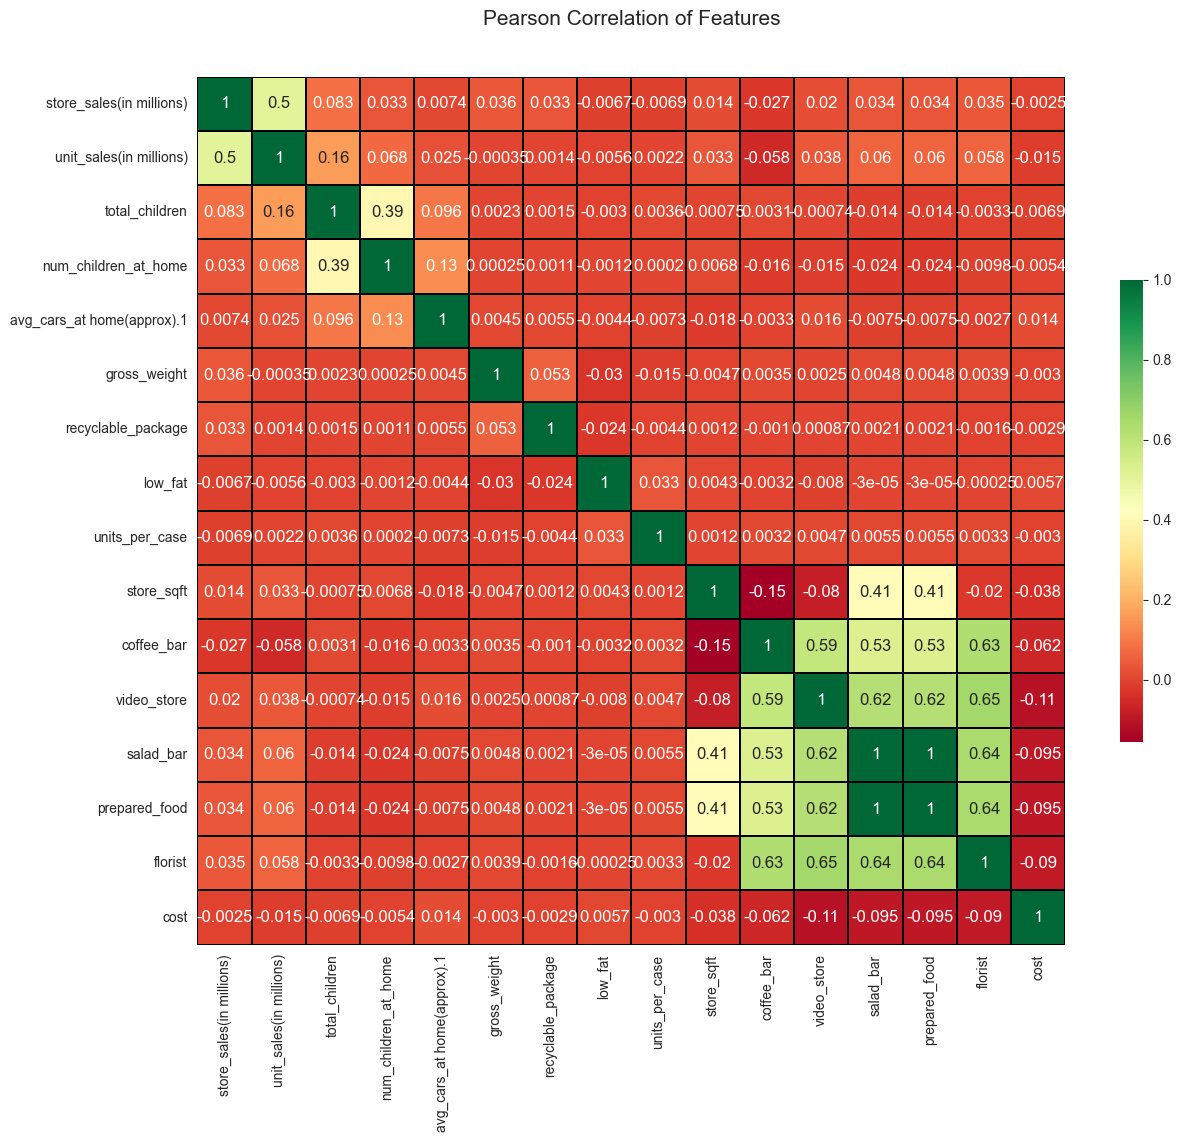

In [23]:
#correlation heatmap of dataset
def correlation_heatmap(df):
    _ , ax = plt.subplots(figsize =(14, 12))
    colormap = sns.diverging_palette(220, 10, as_cmap = True)
    
    _ = sns.heatmap(
        df.corr(), 
        cmap = "RdYlGn",
        square=True, 
        cbar_kws={'shrink':.5 }, 
        ax=ax,
        annot=True, 
        linewidths=0.1,vmax=1.0, linecolor='black',
        annot_kws={'fontsize':12 }
    )
    
    plt.title('Pearson Correlation of Features', y=1.05, size=15)

correlation_heatmap(data1)


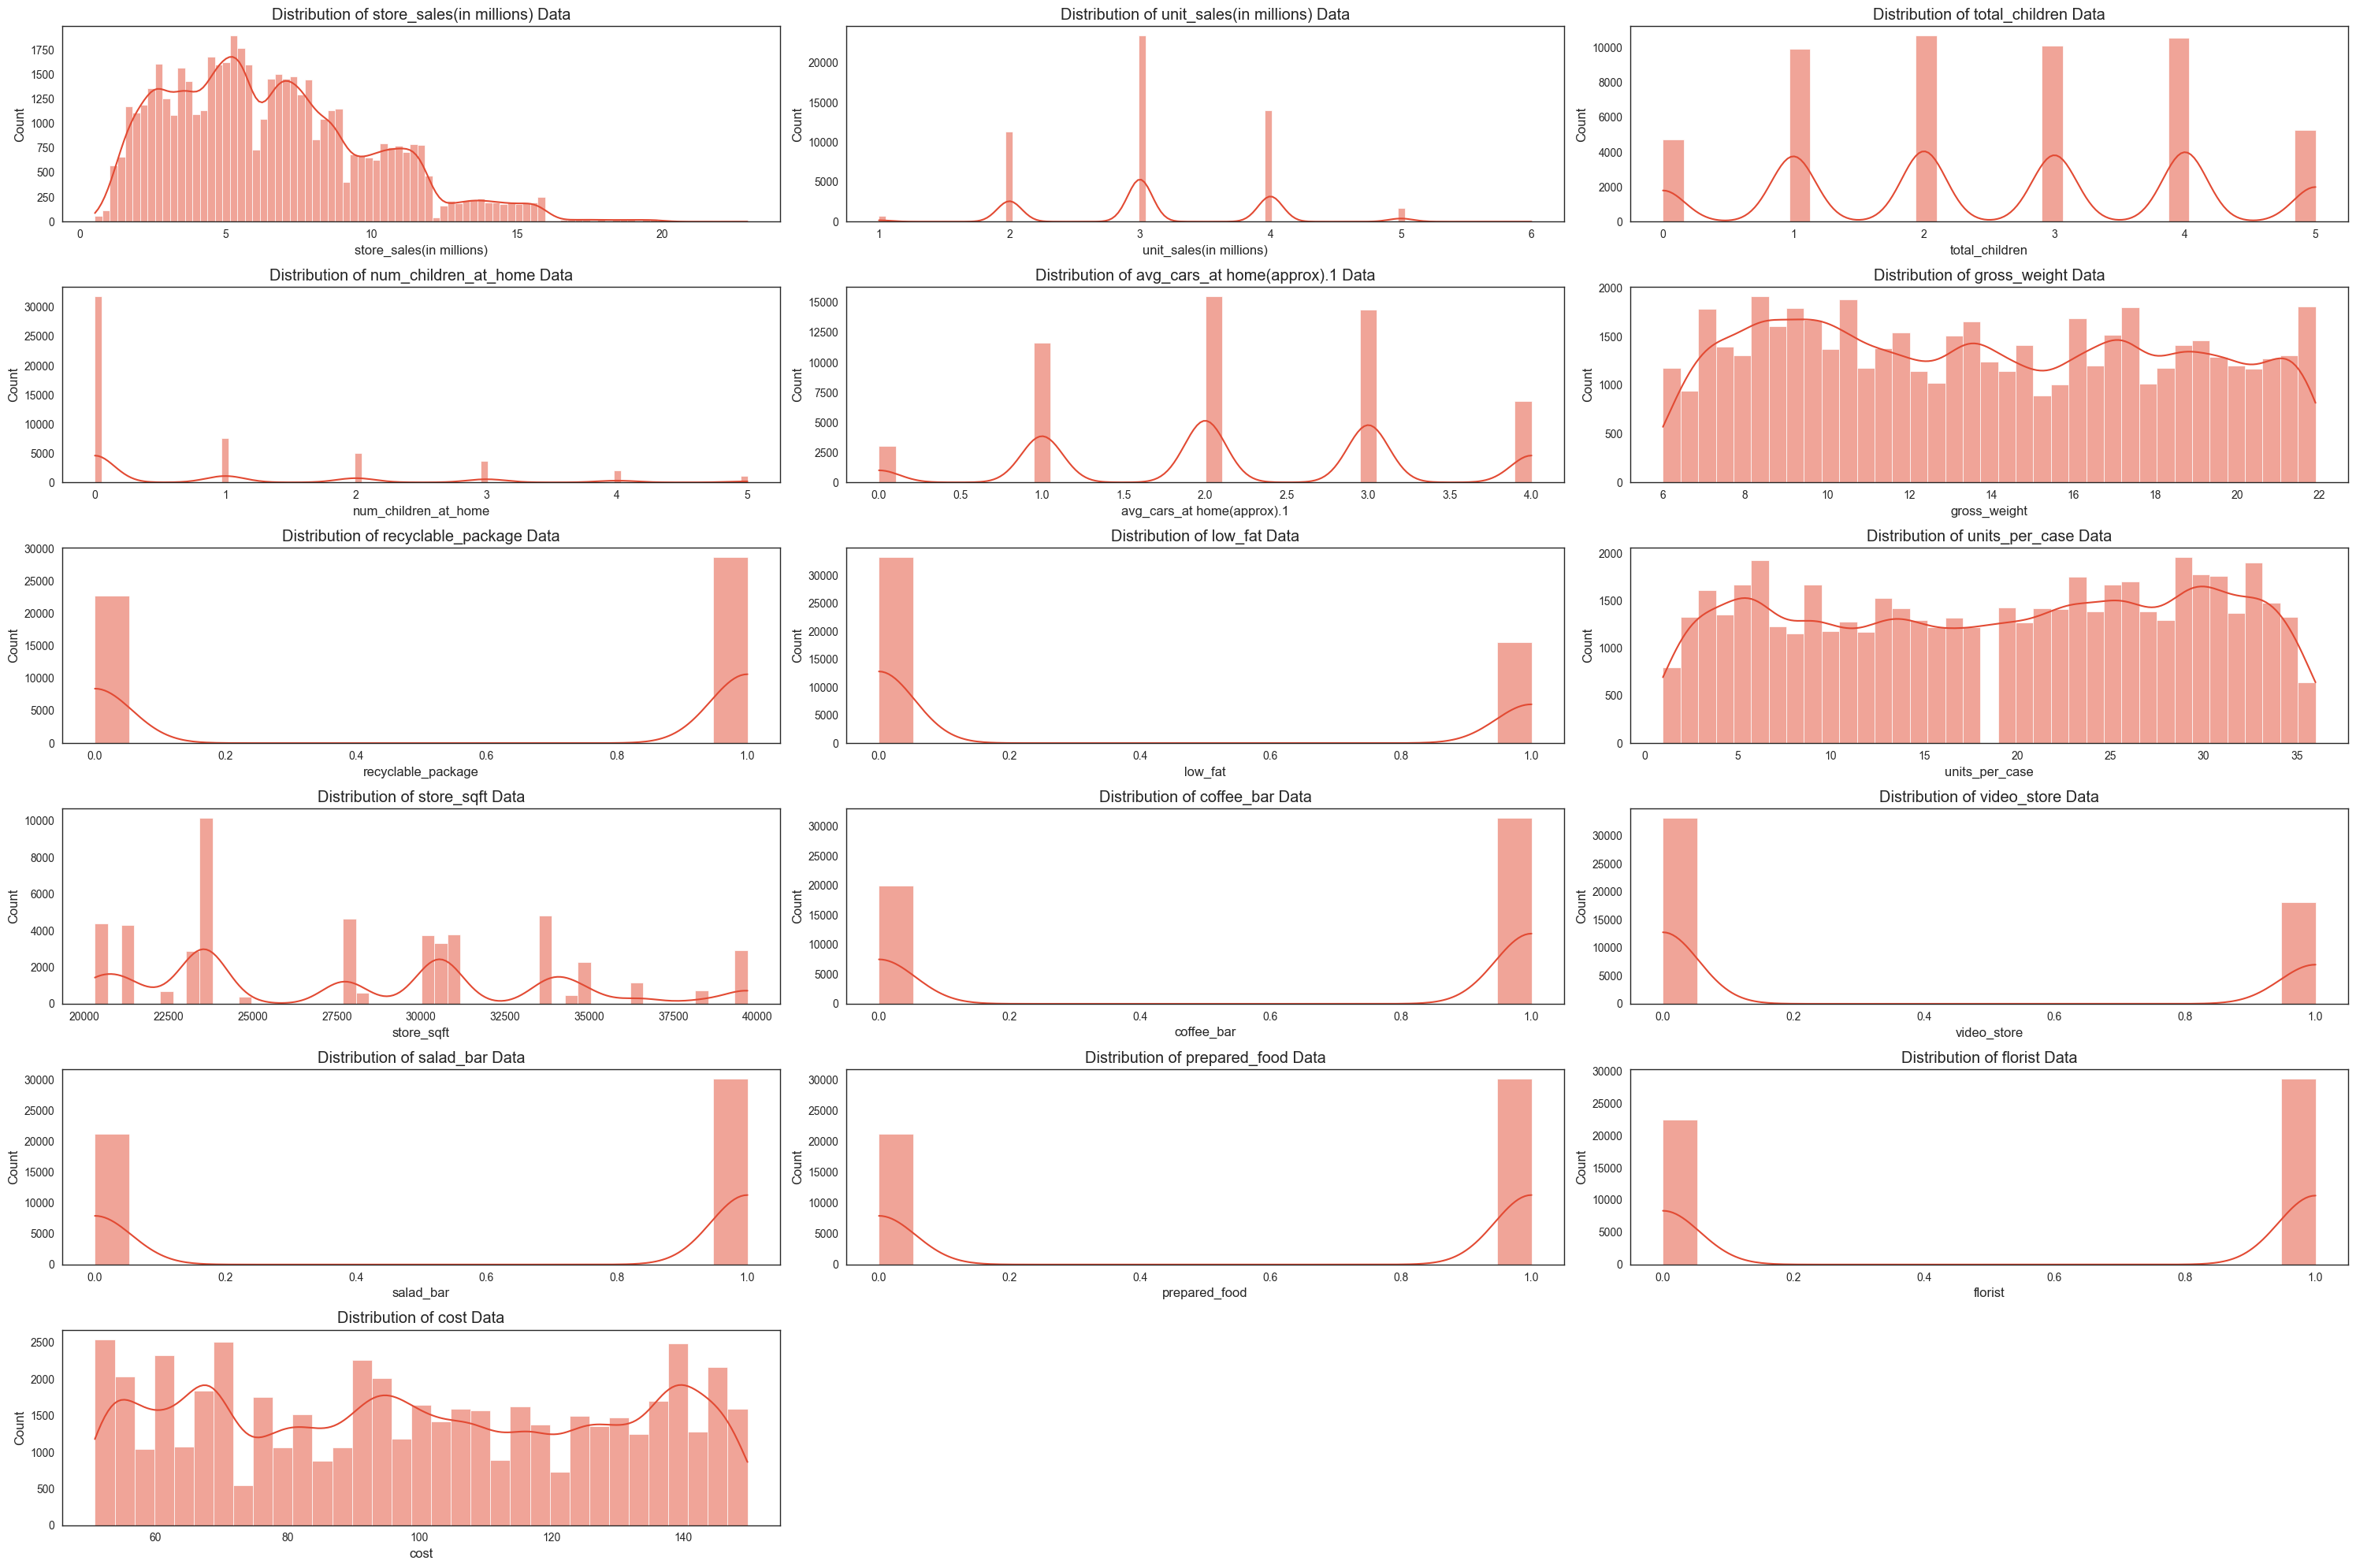

In [30]:
plt.figure(figsize=(30,20))
for i,col in enumerate(data1.columns,1):
    plt.subplot(6,3,i)
    plt.title(f"Distribution of {col} Data")
    sns.histplot(data1[col],kde=True)
    plt.tight_layout()
    plt.plot()
plt.show()
